# Анализ оттока клиентов банка
Необходимо провести исследование оттока клиентов для отдела маркетинга, поскольку в последнее время в банке появилась проблема оттока клиентов, угрожающая существованию банка.


**Задача:**  
выделить сегменты наиболее отточных клиентов банка  
(сегменты должны быть однородными, высокоотточными, покрывать максимум проблемных зон банка)  

**Этапы исследования:**  
1. Загрузка и обзор данных
2. Предобработка данных
    - Исследовать соответствие типов данных
    - Исследовать и обработать пропущенные значения 
    - Исследовать дубликаты 
3. 	Исследовательский анализ данных
    - 	Исследовать распределения данных 
    -	Провести корреляционный анализ
    -	Составить портреты клиентов
4.	Проверка статистических гипотез
    -	Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались
    -	Сформулировать гипотезы после исследовательского анализа данных и проверить их
5.	Подвести итоги анализа, выделить признаки, которые больше всего влияют на отток клиентов
6.	Сегментировать клиентов банка
    -	Выделить 4-5 сегментов клиентов банка, каждый сегмент должен содержать 1-2 тыс. клиентов
    -	Выбрать наиболее отточные сегменты из выделенных
7.	Сформулировать общий вывод по итогу исследования
8.	Дать рекомендации для отдела маркетинга для уменьшения оттока клиентов банка 

# Материалы:
- <a class="dashboard-link" href="https://drive.google.com/file/d/16PH-RutsYMUhSngJfTckB-7NaOGri2zg/view?usp=sharing">Презентация</a>   
- <a class="dashboard-link" href="https://public.tableau.com/app/profile/alexandra.leokhina/viz/_16876801903000/Dashboard1?publish=yes">Дашборд</a>

In [ ]:
conda install matplotlib=3.4

In [ ]:
import sys

!"{sys.executable}" -m pip install phik

In [3]:
# загрузим библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import phik
from scipy import stats as st
from phik.report import plot_correlation_matrix
import warnings

palette = sns.color_palette('pastel')
warnings.filterwarnings('ignore')

## Загрузка и обзор данных
Загрузим данные и посмотрим на них, чтобы понимать, с чем будем работать.  

**Описание датасета**

Для исследования предоставлен датасет, который содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `est_salary` — заработная плата клиента,
- `churn` — ушёл или нет.

In [4]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Вывод  
Исходный датасет содержит 10000 строк и 12 столбцов. В столбцах содержится основная информация о клиентах банка(город, пол, возраст, баланс на счету и т.д.). Есть пропуски в столбцах `age` и `balance`. В датасете 

## Предобработка данных
Загрузим данные и применим методы `info()`, `describe()` для того, чтобы посмотреть описание данных.

In [6]:
# изучим данные
def analysis(df):
    display(df.head(), 
            df.info(), 
            df.describe())

analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


None

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


### Исследование соответствия типов данных
Рассмотрим типы данных столбцов. Все столбцы имеют корректный тип, ничего изменять не будем.   

Не все столбцы находятся в нижнем регистре, поэтому приведем название всех столбцов к одному формату для удобства в дальнейшем использовании.

In [7]:
df.columns = df.columns.str.lower()
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Исследование и обработка пропущенных значений
Пропуски содержат столбцы `age` и `balance`.  
Пропусков в столбце age менее 1%, поэтому можем удалить строки с пропусками в этом столбце. Причина пропусков в данном столбце вероятно связана с техническими ошибками, так как обычно у банков есть вся основная информация (паспортные данные) о клиентах.

In [8]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
userid,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
equity,0.000000
balance,23.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


In [9]:
# удаляем пропуски в столбце age
df = df[df.age.notna()]

Пропусков в столбце `balance` намного больше - 23%, удалить их не можем. Заполнение медианой или средним исказит общую картину, поэтому попробуем исследовать распределение пропусков, возможно они имеют какую-то тенденцию и с помощью этого мы сможем их заполнить.    

Если сравнивать данные, имеющие и не имеющие пропуски в столбце `balance`, можно выделить следующие наблюдения:  
- данные с пропусками имеют более высокие баллы кредитного скоринга
- данные с пропусками и без имеют схожее распределение возраста
- данные с пропусками имеют меньшее количество баллов собственности
- в данных с пропусками большинство клиентов имеют 1 продукт, а в данных без пропусков 2 продукта
- данные с пропусками и без имеют схожее количество тех клиентов, которые активны и нет, или имеют кредитну карту и нет
- почти все клиенты в данных с пропусками не ушли из банка, в отличие от данных без пропусков  

Таким образом, мы можем заполнить пропуски в зависимости от возраста клиента, так как данные имеют схожее распределение. Но поскольку пропуски составляют 23% от всего датасета, такое заполнеие может исказить картину, так как по другим столбцам распределения сильно отличаются, поэтому все таки лучше оставить данный столбец без изменений.   

Вероятно причиной пропусков в данном случае также являются технические ошибки в банке, так как о данных о балансе на счете отвечает банк, и какой-либо баланс все равно должен быть, даже если денег на счету нет.

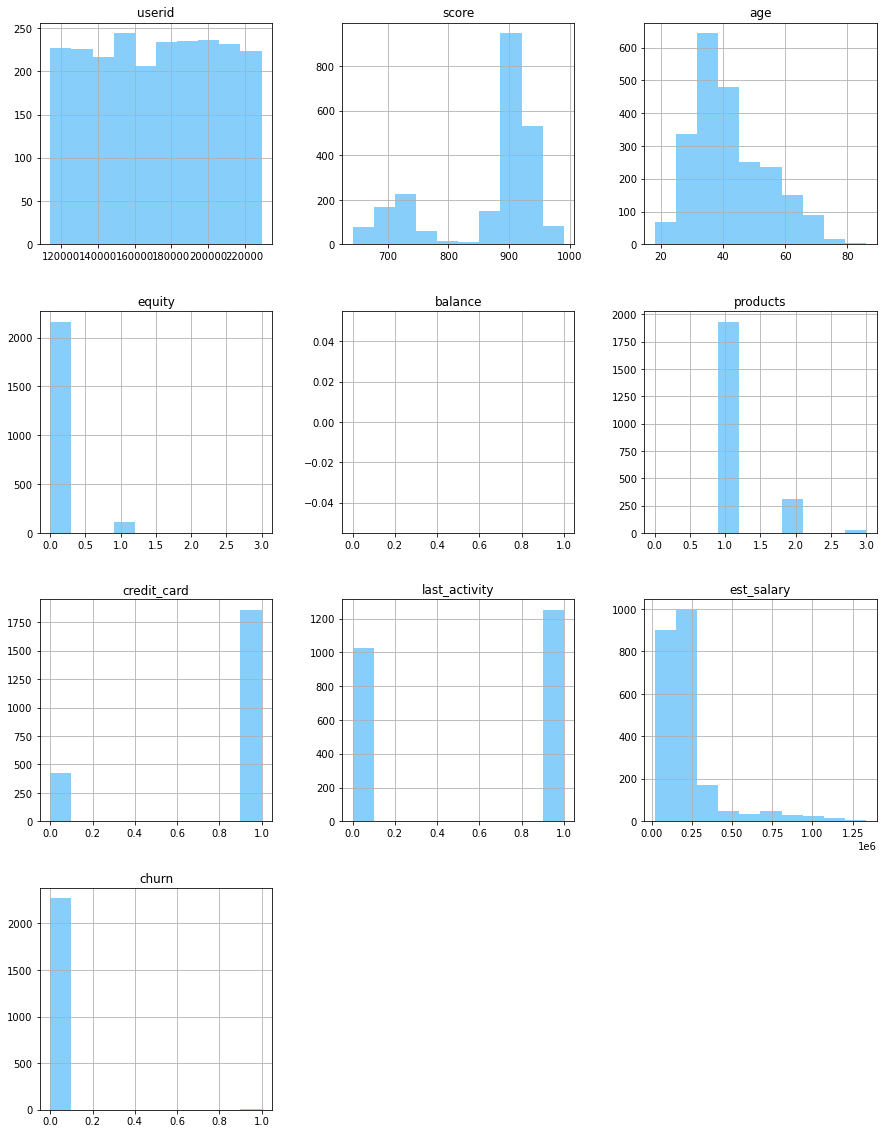

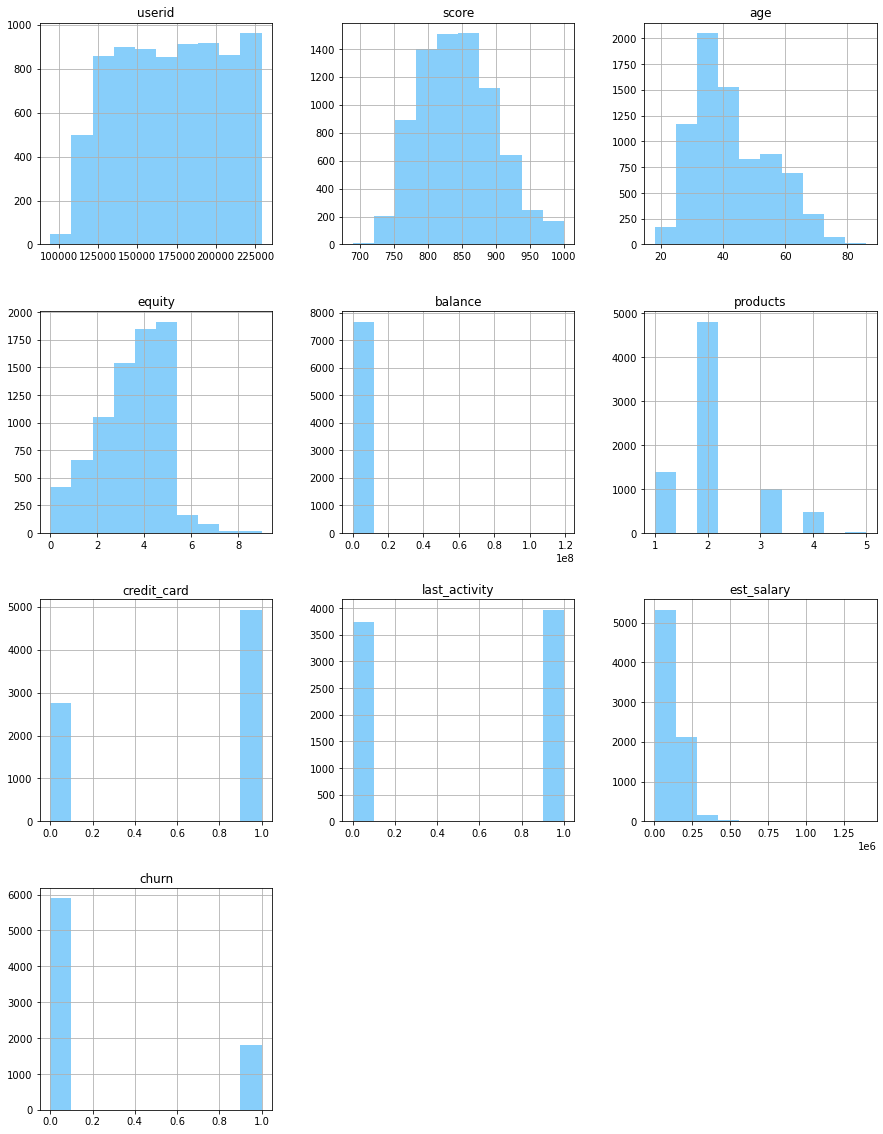

In [10]:
df[df.balance.isna()].hist(figsize=(15, 20), color='#87CEFA')
df[df.balance.notna()].hist(figsize=(15, 20), color='#87CEFA');

### Исследование дубликатов
Начнем с проверки данных на явные дубликаты.  
Явных дубликатов нет.

In [11]:
df.duplicated().sum()

0

Перейдем к проверке данных на неявные дубликаты.  
Столбец `userid` должен иметь уникальный id пользователя. Проверим уникальные значения данного столбца.  
Видим, что некоторые id встречаются несколько раз. Выведем строки с этими id, чтобы понять яляются ли они дубликатами.

In [12]:
df.userid.value_counts()

120258    2
217643    2
199312    2
170312    2
200863    2
         ..
181682    1
179637    1
173494    1
175543    1
215039    1
Name: userid, Length: 9924, dtype: int64

Видим, что одинаковые `user_id` не являются дубликатами. Скорее всего банки в разных городах могут иметь одинаковые `id` клиентов. Также видим, что в дублях один клиент ушел, а другой нет, видимо после того, как клиент ушел из банка `id` стал использоваться повторно. Вероятно, это произошло из-за технического сбоя в банке.

In [13]:
df[df.userid.isin(df.userid.value_counts().to_frame().query("userid > 1").index)].sort_values(by='userid').head(40)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1


Неявных дубликатов в столбцах с категориальными данными (`city`, `gender`) нет.

In [14]:
df.city.value_counts()

Ярославль    5875
Рыбинск      2683
Ростов       1416
Name: city, dtype: int64

In [15]:
df.gender.value_counts()

М    4991
Ж    4983
Name: gender, dtype: int64

In [16]:
df.credit_card.value_counts()

1    6784
0    3190
Name: credit_card, dtype: int64

In [17]:
df.last_activity.value_counts()

1    5215
0    4759
Name: last_activity, dtype: int64

In [18]:
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [19]:
df.to_csv('df.csv', index=False)


from IPython.display import FileLink
FileLink('df.csv')

/home/jovyan/work/df.csv

### Вывод 
В ходе предобработки:
- названия столбцов были приведены к нижнему регистру
- удалены строки с пропусками в столбце `age`
- проанализированы и оставлены без изменения пропуски в столбце `balance`
- явные дубликаты выявлены не были
- выявлены дубликаты в столбце `userid`, но после анализа были оставлены без изменений

## Исследовательский анализ данных
### Исследование распределений данных
Начнем с рассмотрения общих распределений каждого из столбцов.  
Поскольку столбцы имеют разные типы данных, то для них необходимы разные типы графиков. Разделим столбцы на категориальные и количественные.  

К категориальным отнесем те, которые имеют небольшое количество признаков.   
Для визуализации категориальных признаков используем график `countplot`, который будет показывать сколько клиентов приходится на каждый признак.

К количественным отнесем непрерывные признаки, а также те в которых очень много уникальных значений(например, возраст будет неудобно визуализировать с помощью гистограммы, так как значений слишком много).   
Для визуализации количественных признаков будем использовать график `histplot`, чтобы посмотреть общее распределение и выделить интервал, в котором самое большое количество клиентов.

In [20]:
# выделим категориальные признаки для визуализации
cat_columns = ['churn', 'city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']

# выделим количественные признаки для визуализации  
num_columns = ['score', 'age', 'balance', 'est_salary']

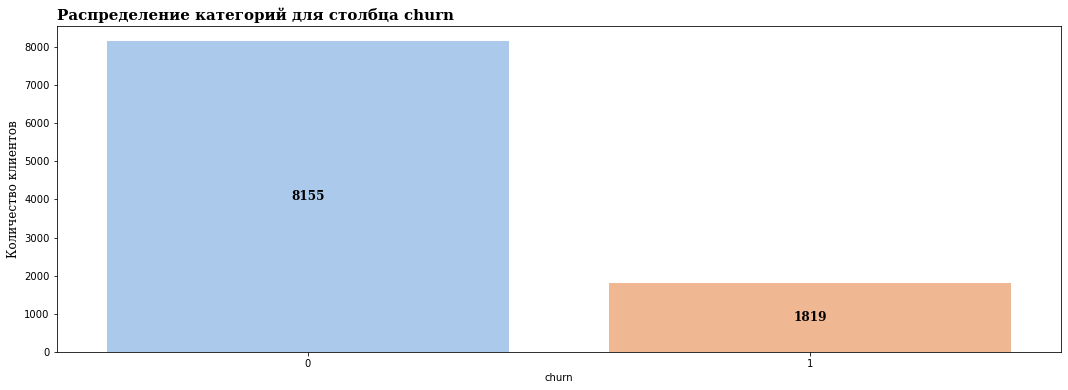

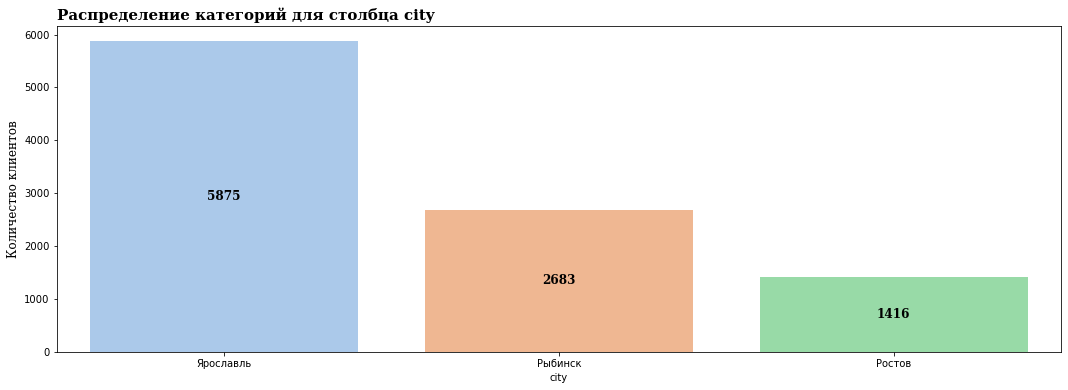

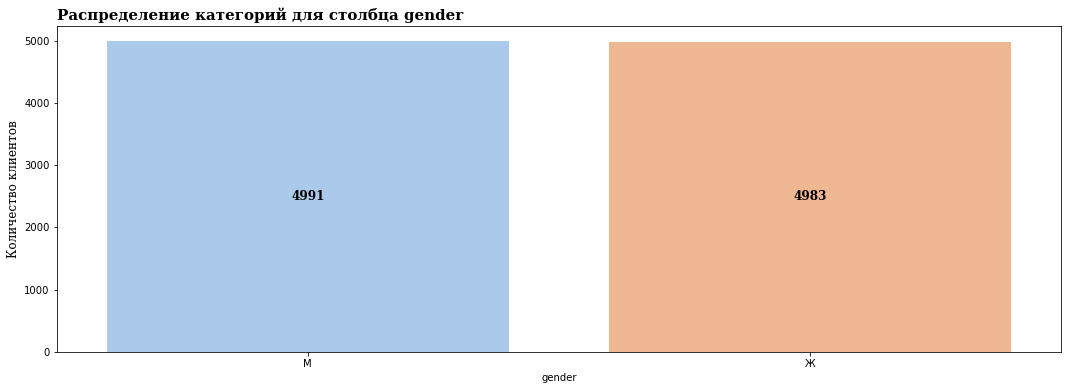

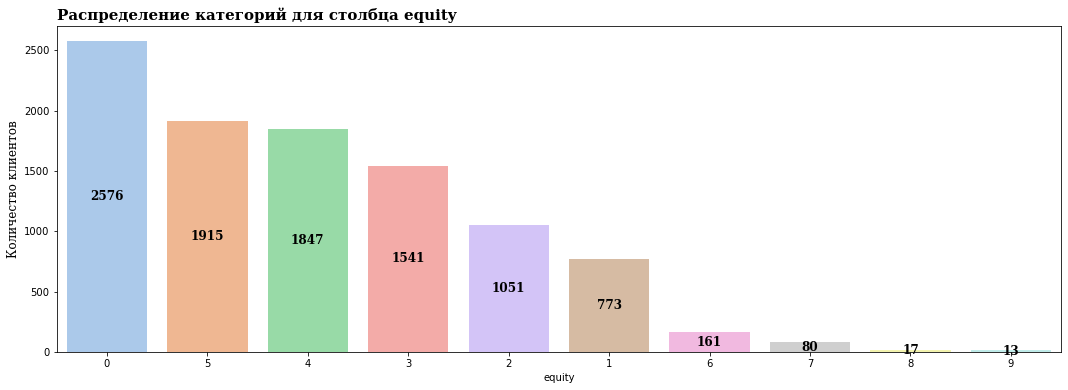

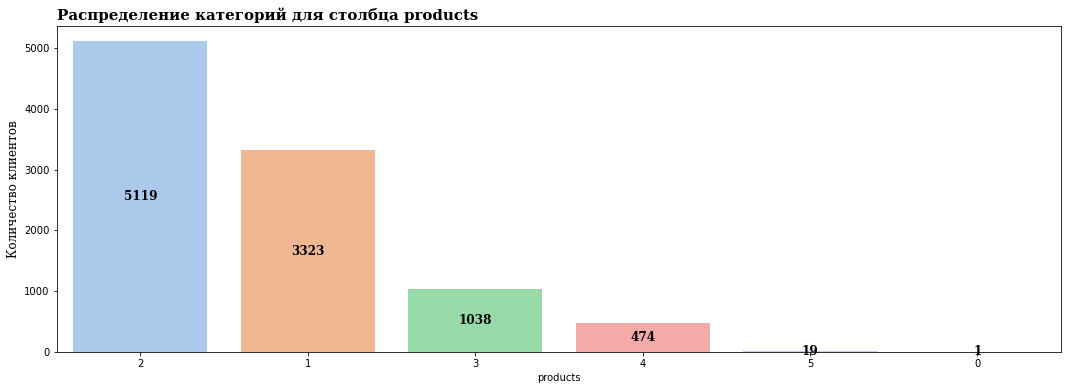

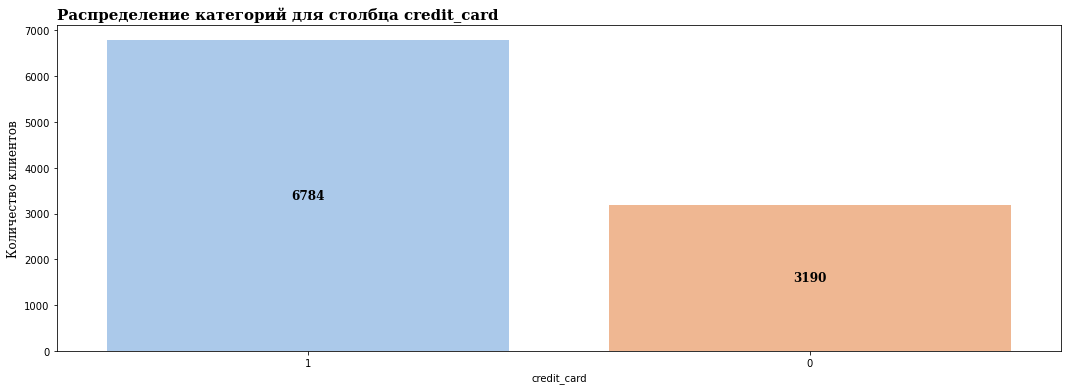

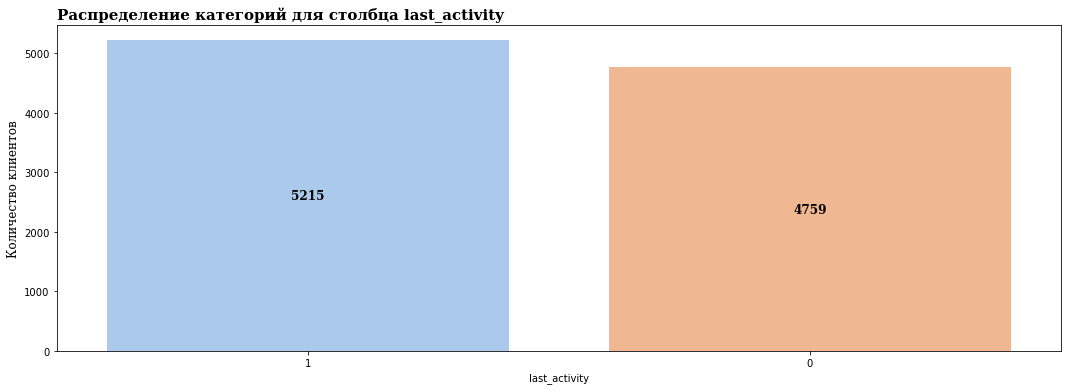

In [21]:
# визуализируем категориальные признаки
for i in cat_columns:
    plt.figure(figsize = (18, 6))
    ax = sns.countplot(x=df[i], order = df[i].value_counts().index, palette=palette)
    plt.title(f'Распределение категорий для столбца {i}', 
          fontdict= {'fontsize': 15, 'fontweight':'bold', 
                     'fontfamily':'serif'}, loc = 'left')
    plt.ylabel('Количество клиентов', fontsize=12, fontfamily='serif')
    plt.bar_label(container=ax.containers[0], fontsize=12, 
                  fontweight='bold', fontfamily='serif', label_type='center')
    plt.show()

По графикам выше можно сделать следующие **выводы:**  
- В датасете 18% клиентов являются ушедшими из банка, то есть выборка является несбалансированной относительно основного рассматриваемого признака.
- Больше всего клиентов банка находится в Ярославле, следом идет Рыбинск, и на последнем месте по количеству пользователей находится Ростов (чем больше город, тем больше клиентов банка).
- В датасете почти одинаковое количество мужчин и женщин.
- У 25% клиентов количество баллов собственности равно 0, 3-5 баллов встречаются довольно часто, 6-9 баллов встречаются у клиентов очень редко.
- Половина влиентов банка имеют 2 продукта, которыми пользуется клиент. На втором месте по количеству клиентов - 1 продукт. Клиентов, пользующихся 5 или 0 продуктами почти нет.
- 68% пользователей имеют кредитные карты. 
- 52% клиентов являются активными.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

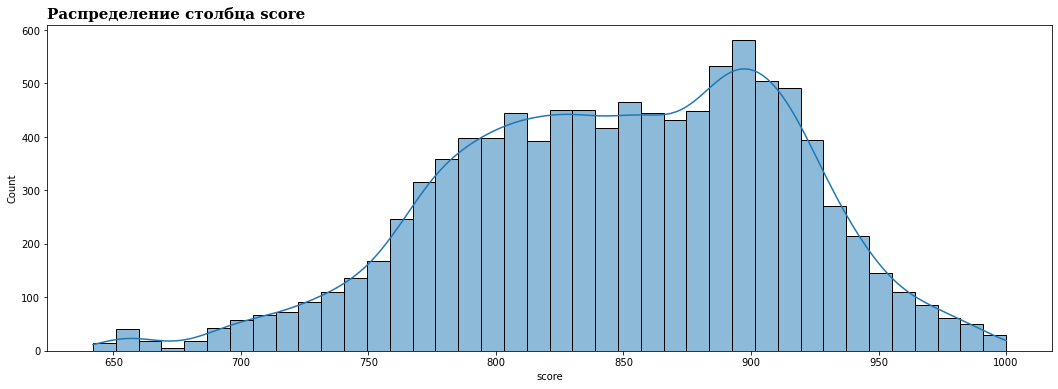

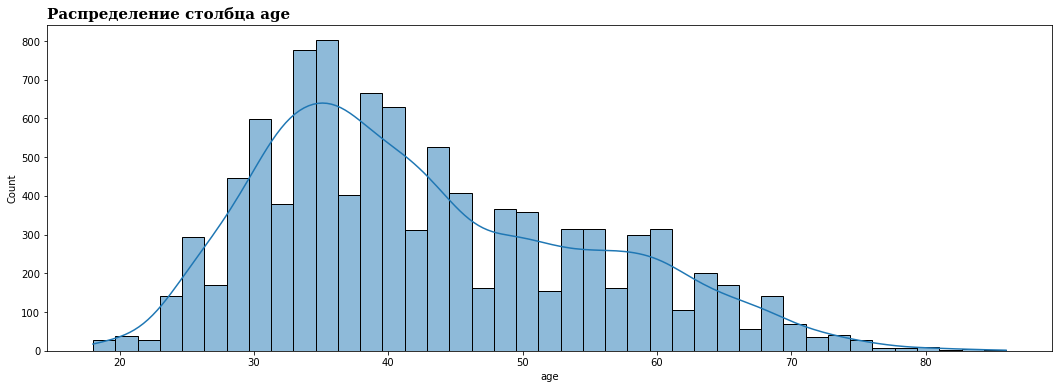

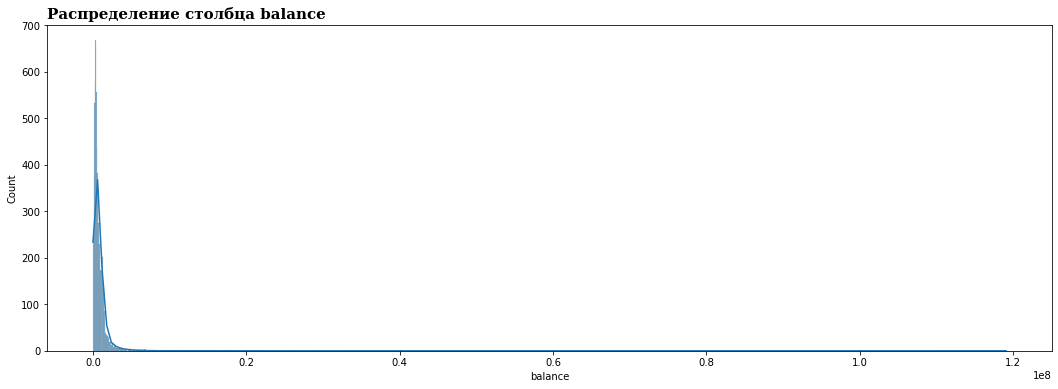

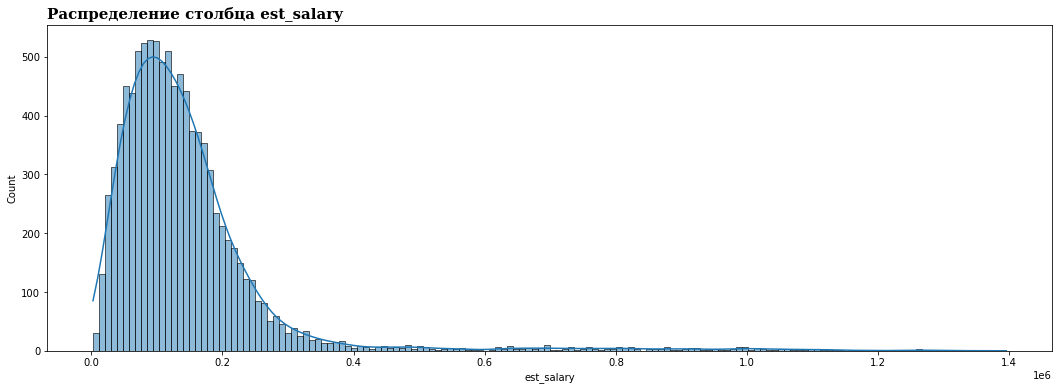

In [22]:
# визуализируем количественные признаки
for i in num_columns:
    plt.figure(figsize = (18, 6))
    sns.histplot(x=df[i], kde=True)
    plt.title(f'Распределение столбца {i}', 
              fontdict= {'fontsize': 15, 'fontweight':'bold', 
                         'fontfamily':'serif'}, loc = 'left')
    plt.show()

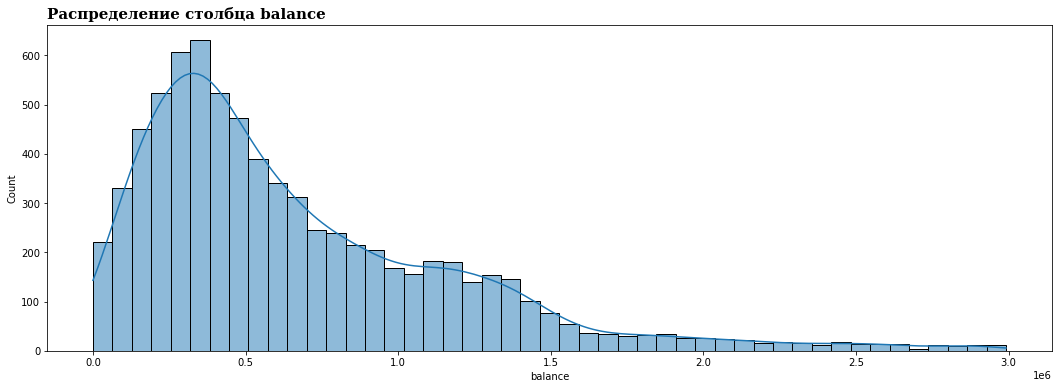

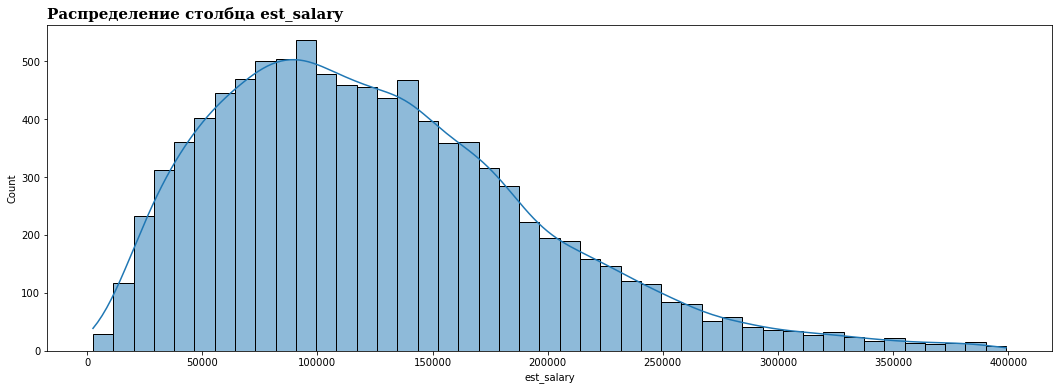

In [23]:
# обрежем слишком большие и редко вречающиеся значения, чтобы лучше визуализировать график
plt.figure(figsize = (18, 6))
sns.histplot(x=df.query('balance < 3000000')['balance'], kde=True)
plt.title('Распределение столбца balance', 
          fontdict= {'fontsize': 15, 'fontweight':'bold', 
                     'fontfamily':'serif'}, loc = 'left')
plt.show()

plt.figure(figsize = (18, 6))
sns.histplot(x=df.query('est_salary < 400000')['est_salary'], kde=True)
plt.title('Распределение столбца est_salary', 
          fontdict= {'fontsize': 15, 'fontweight':'bold', 
                     'fontfamily':'serif'}, loc = 'left')
plt.show()

По графикам выше можно сделать следующие **выводы:**
- Баллы кредитного скоринга распределены в промежутке от 640 до 1000. Чеще всего встречаются клиенты с рейтингом 890-910.
- В датасете представлены данные клиентов в возрасте от 18 до 86. Больше всего клиентов сосредоточено на промежутке 30-40 лет.
- Некоторые клиенты имеют очень большие балансы на счетах (доходят до миллиардных сумм). Но большинство клиентов имеют баланс от 250 до 500 тыс. рублей.
- Разброс заработных плат тоже очень велик, при этом самое большое количество клиентов имеют з/п равную 100 тыс. рублей.

### Исследование распределений данных в разрезе оттока
Перейдем к рассмотрению распределений в разрезе оттока клиентов.  
Поскольку данные являются несбалансированными (около 20% ушедших клиентов), для визуализации распределений необходимо использовать графики, которые будут лучше представлять информацию, не учитывая размер выборок. Поэтому для визуализации распределений данных в разрезе оттока будем использовать нормализованные гистограммы для количественных признаков и круговые диаграммы, которые показывают процентное соотношение для категориальных признаков.  
Также для удобства отбросим слишком большие и редкие значение в столбцах `balance`, `est_salary`.

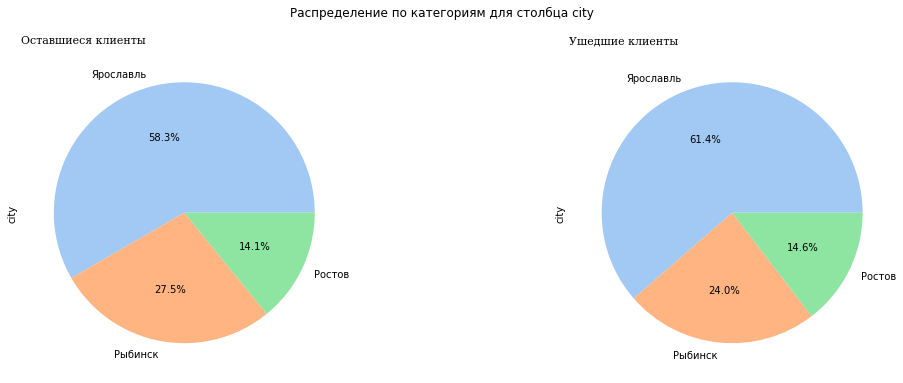

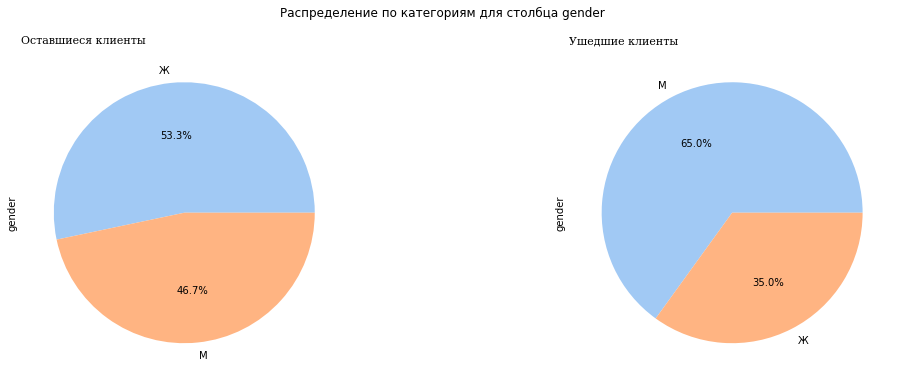

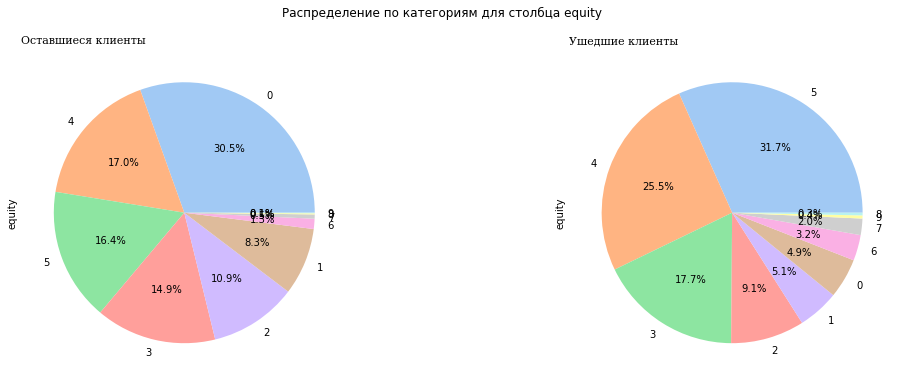

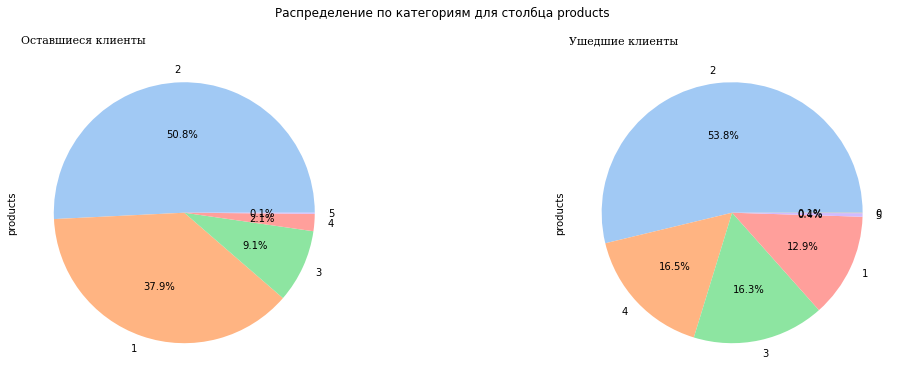

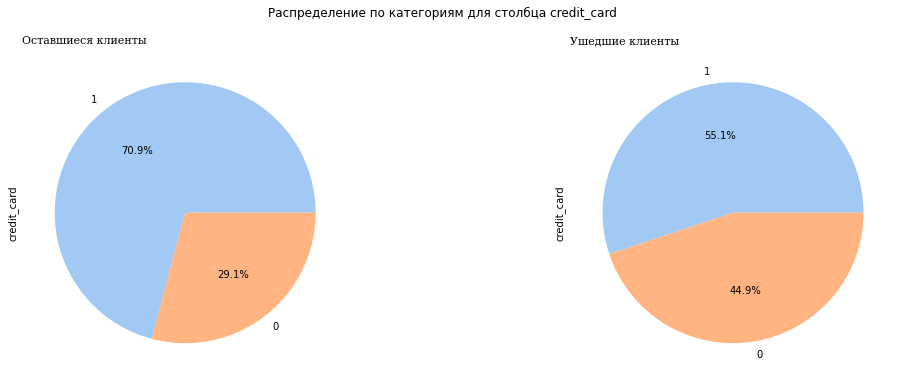

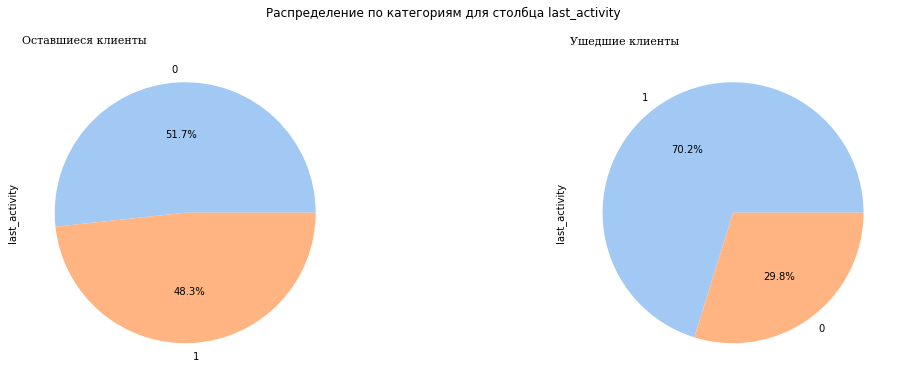

In [24]:
# визуализируем категориальные признаки
for i in cat_columns[1:]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    axes[0].set_title('Оставшиеся клиенты',
                fontdict = {'fontsize': 11, 'fontfamily':'serif'}, loc = 'left')
    axes[1].set_title('Ушедшие клиенты',
                fontdict = {'fontsize': 11,  'fontfamily':'serif'}, loc = 'left')
    for j in range(2):   
        (df.query('churn == @j')[i].value_counts().plot(kind='pie', subplots=True, autopct='%1.1f%%', 
                                                        ax=axes[j], legend=None, 
                                                        title=(f'Распределение по категориям для столбца {i}'),
                                                        colors=palette))

Построим также гистограммы по категориям в разрезе оттока клиентов.

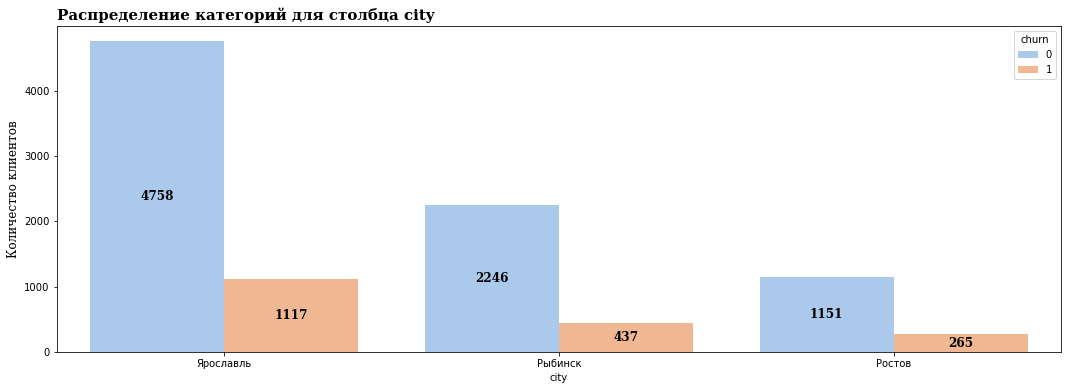

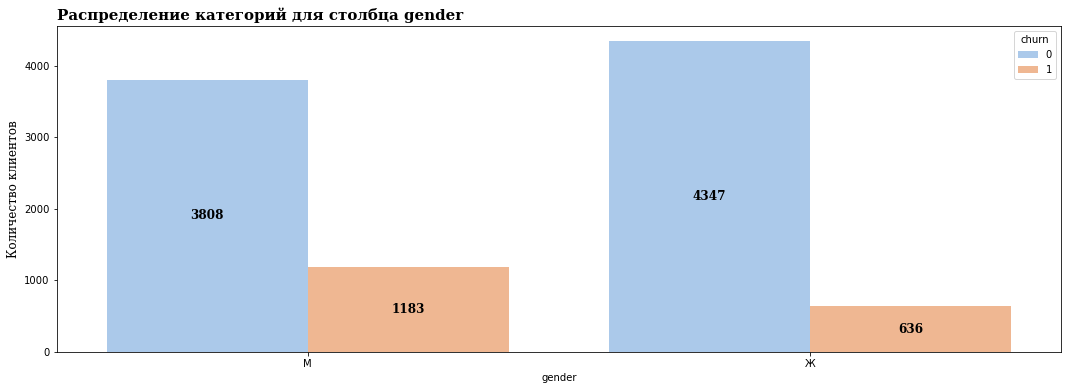

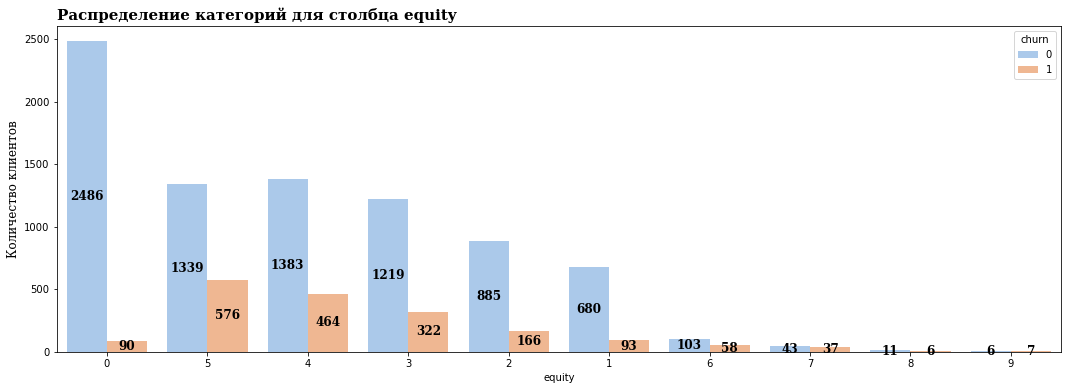

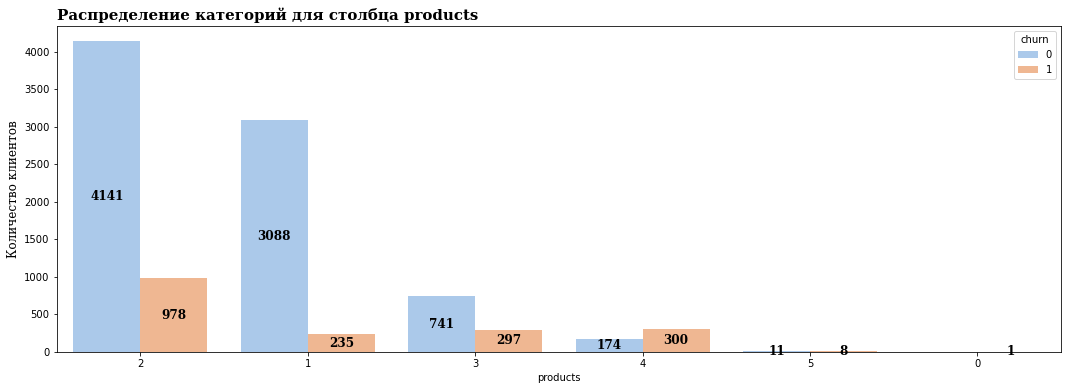

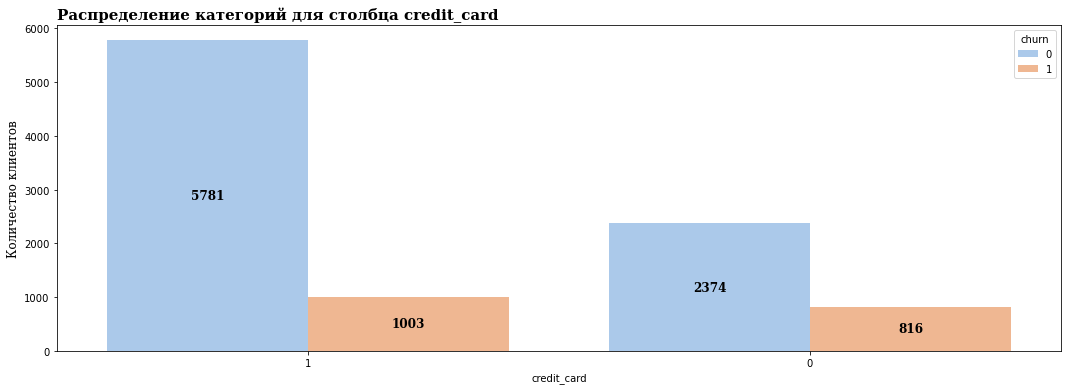

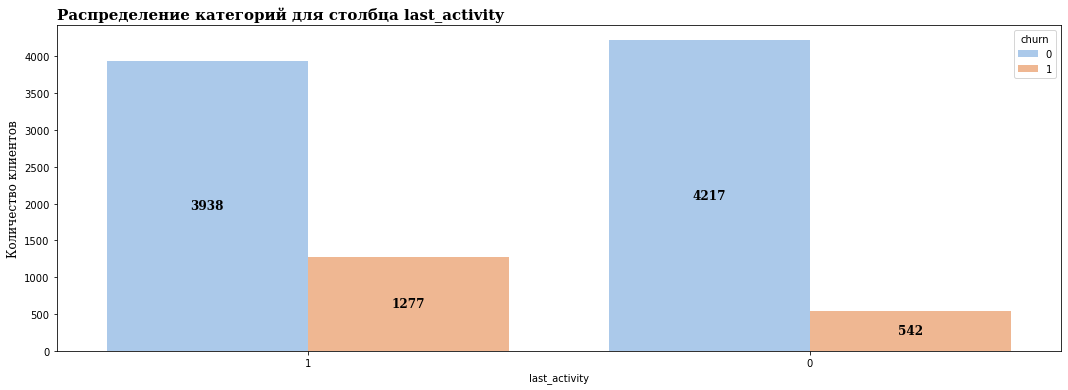

In [25]:
# визуализируем категориальные признаки
for i in cat_columns[1:]:
    plt.figure(figsize = (18, 6))
    ax = sns.countplot(x=df[i], order = df[i].value_counts().index, palette=palette, hue=df.churn)
    plt.title(f'Распределение категорий для столбца {i}', 
          fontdict= {'fontsize': 15, 'fontweight':'bold', 
                     'fontfamily':'serif'}, loc = 'left')
    plt.ylabel('Количество клиентов', fontsize=12, fontfamily='serif')
    plt.bar_label(container=ax.containers[0], fontsize=12, 
                  fontweight='bold', fontfamily='serif', label_type='center')
    plt.bar_label(container=ax.containers[1], fontsize=12, 
                  fontweight='bold', fontfamily='serif', label_type='center')
    plt.show()

По графикам выше можно сделать следующие **выводы:**  
- 61% ушедших клиентов банка из Ярославля, 58% оставшихся клиентов тоже из Ярославля. Вывод соответствует выводу по общему распределению, так как в Ярославле самое большое количество клиентов. При сравнении оттока по городам также видно, что в Ярославле самый большой отток, а в Рыбинске самый маленький.
- Пол оставшихся клиентов распределен практически поровну по 50%. Среди ушедших клиентов почти в 2 раза больше мужчин, то есть мужчины уходят из банка чаще.
- Среди оставшихся клиентов большее количество из них имеют баллы собственности равные 0 (далее идут 3-5 баллов, распределены примерно одинаково). Среди ушедших - больше всего клиентов имеют баллы собственности равные 5, на втором месте клиенты с 4 баллами собственности, на 3 месте клиенты с 3 баллами собственности. Чаще всего уходят клиенты, у которых 5 баллов, а реже всего те, у кого 0 баллов.
- В распределении по продуктам среди ушедших и оставшихся клиентов больше тех, кто имеет 2 банковских продукта, такие клиенты составляют половину от всех. Далее распределение отличается. Среди оставшихся клиентов на втором месте больше тех, кто имеет 1 продукт. А среди ушедших 2-3 места поровну разделили те, у кого 3-4 продукта. При этом чаще всего уходят клиенты пользующиеся 4 продуктами, количество ушедших превышает количество оставшихся.
- 70% оставшихся клиентов имеют кредитную карту, а из ушедших клиентов только 55% имеют кредитную карту. При этом клиенты, не имеющие кредитную карту, уходят чаще.
- Среди оставшихся клиентов половина являются активными, то есть они пользуются банковскими продуктами банка. Среди ушедших доля активных составляет 70%, вероятно какой-то продукт их не устроил, после чего они решили перестать пользоваться услугами банка. Таким образом, активные клиенты уходят чаще.

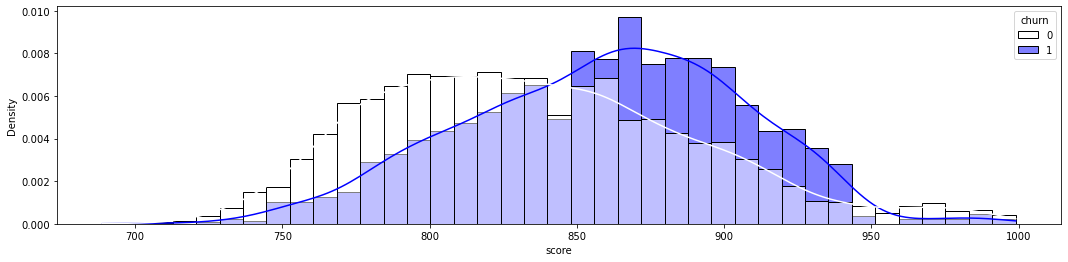

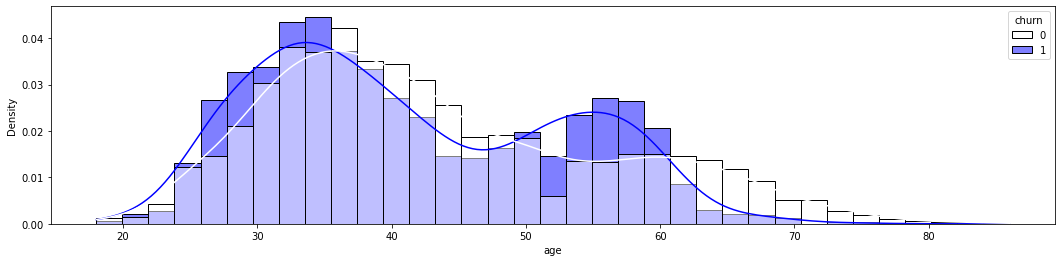

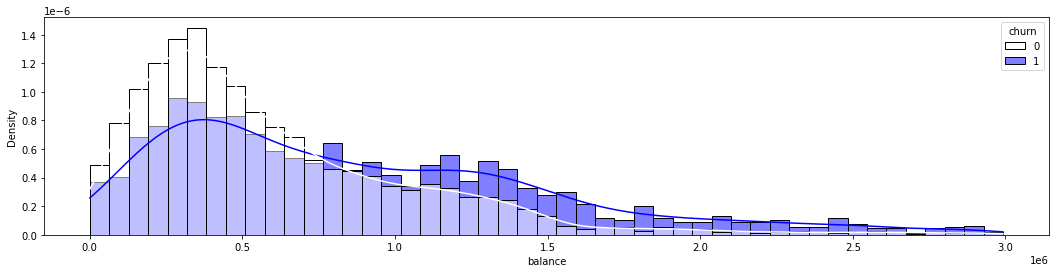

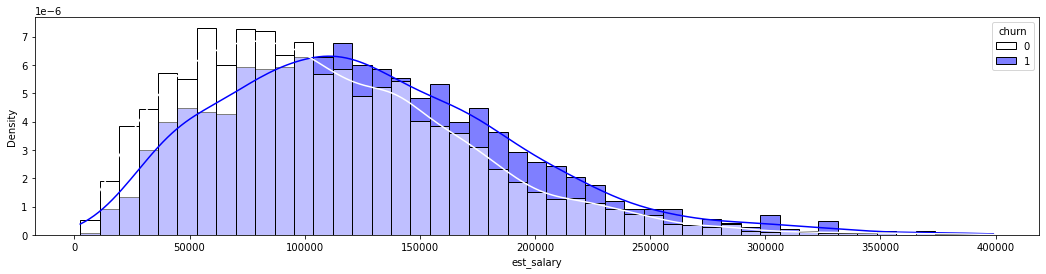

In [26]:
# визуализируем количественные признаки
for i in num_columns:
    plt.figure(figsize = (18, 4))
    sns.histplot(data=df.query('balance < 3000000 & est_salary < 400000'),
                hue='churn',
                x=i,
                stat='density',
                common_norm=False,
                palette='flag',
                kde=True)
    plt.show()

По графикам выше можно сделать следующие **выводы:**
- Оставшиеся клиенты имеют баллы кредитного скоринга от 700 до 840 и от 945 до 1000. Отточные клиенты имеют баллы в промежутке от 840 до 945, самый большой отток у клиентов с баллами 860-870.
- Оставшиеся клиенты имеют возраст от 35 до 49 лет и от 61 до 80. Возраст ушедших клиентов находится в промежутке от 20 до 35 лет и от 49 до 61, самый большой отток клиентов 25-30 или 54-56 лет.
- Баланс на счете оставшихся клиентов не превышает 750 тыс. рублей. У ушедших клиентов на счете более 750 тыс. рублей. То есть склонны уходить те, у кого больше денег на счете.
- Осташиеся клиенты в основном имеют з/п менее 90 тыс. рублей. З/п у ушедших пользователей находится на интервале более 90 тыс.рублей.

### Проведение корреляционного анализа
Для расчета корреляции между признаками будем использовать метод `phik_matrix`, поскольку он позволяет вычислять взаимосвязи не только между количественными, но и между категориальными признаками.  

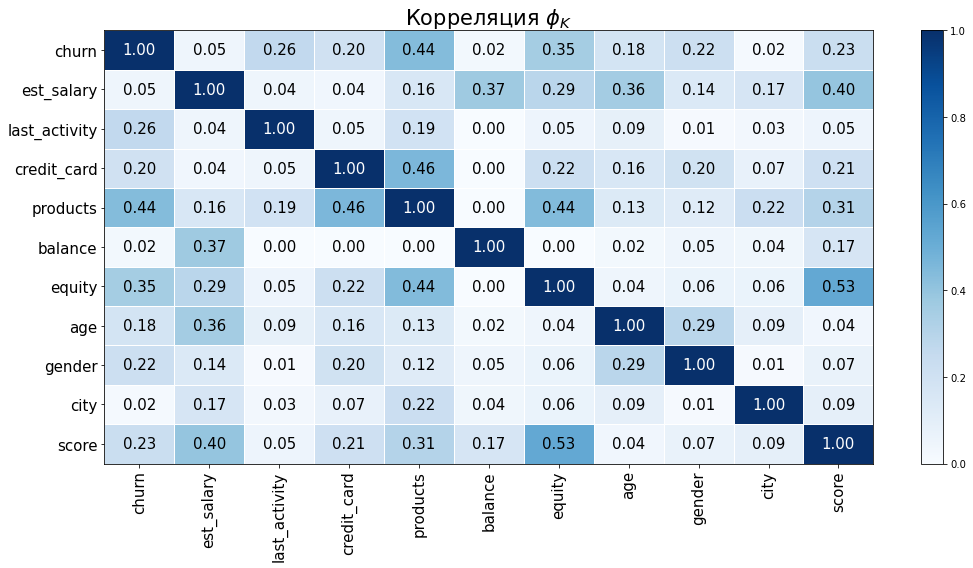

In [27]:
# визуализируем матрицу корреляций с помощью тепловой карты
plot_correlation_matrix(df.drop('userid', axis=1).phik_matrix(interval_cols=num_columns).values, 
                        x_labels=df.drop('userid', axis=1).phik_matrix(interval_cols=num_columns).columns, 
                        y_labels=df.drop('userid', axis=1).phik_matrix(interval_cols=num_columns).index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'Корреляция $\phi_K$', 
                        fontsize_factor=1.5, figsize=(15,8));
plt.tight_layout();

По матрице корреляций видно, что с уходом пользователя банка самую большую корреляцию имеет признак `products` - 0.44, то есть количество продуктов, которыми пользуется клиент больше всего взаимосвязано с его уходом.  
Также высокий коэффициент корреляции имеют следующие признаки:
- `equity` (количество баллов собственности) - 0.35
- `last_activity` (активный ли клиент) - 0.26
- `score` (баллы кредитного скоринга) - 0.23  

В дальнейшем при сегментации и выделении отточных сегментов стоит обратить внимание на эти признаки.  

Самая слабая зависимость ухода клиента из банка со следующими признаками:
- `est_salary` (заработная плата) - 0.05
- `balance` (баланс на счете) - 0.02
- `city` (город) - 0.02

### Вывод: составление портретов клиентов
Резюмируем все сделанные выше выводы и составим портреты ушедших и оставшихся клиентов банка.  

**Оставшиеся клиенты:**
- Проживают в городе Ярославль или Рыбинск
- Могут быть как мужского, так и женского пола
- Имеют количество баллов собственности равное 0
- Имеют 2 банковских продукта
- Имеют кредитную карту
- Могут быть как активными, так и неактивными клиентами банка
- Имеют баллы кредитного скоринга от 700 до 840 или от 945 до 1000
- Возраст клиентов от 35 до 49 лет или от 61 до 80
- Имеют баланс на счете ниже 750 тыс. рублей
- Имеют з/п менее 90 тыс. рублей

**Ушедшие клиенты:**
- Проживают в городе Ярославль
- Клиенты мужского пола
- Имеют количество баллов собственности равное 5
- Имеют 2 или 4 банковских продукта
- Не имеют кредитную карту
- Являются активными клиентами банка
- Имеют баллы кредитного скоринга от 840 до 945, самый большой отток у клиентов с баллами 860-870
- Возраст клиентов от 20 до 35 лет или от 49 до 61, самый большой отток клиентов 25-30 или 54-56 лет
- Имеют баланс на счете выше 750 тыс. рублей
- Имеют з/п более 90 тыс. рублей

Далее будем комбинировать некоторые из этих признаков и и скать сегменты, в которых отток в сегменте выше общего оттока в банке.

## Проверка статистических гипотез
### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались
Необходимо проверить гипотезу различия дохода между оставшимися и ушедшими клиентами, то есть это гипотеза о равенстве средних двух генеральных совокупностей.  
Для проверки такой гипотезы необходимо использовать метод `scipy.stats.ttest_ind (array1, array2, equal_var)`. Но необходимо проверить, нормально ли распределены выборки. Для этого построим гистограмму распределения для столбца `est_salary`.    

Видим, что из-за выбросов выборки распределены не нормально. Но это условие не препятствие для использования t-теста блягодаря ЦПТ, так как размеры выборок намного больше нескольких десятков. Также выборки не зависят друг от друга, поэтому можем использовать t-тест, все условия выполнены.

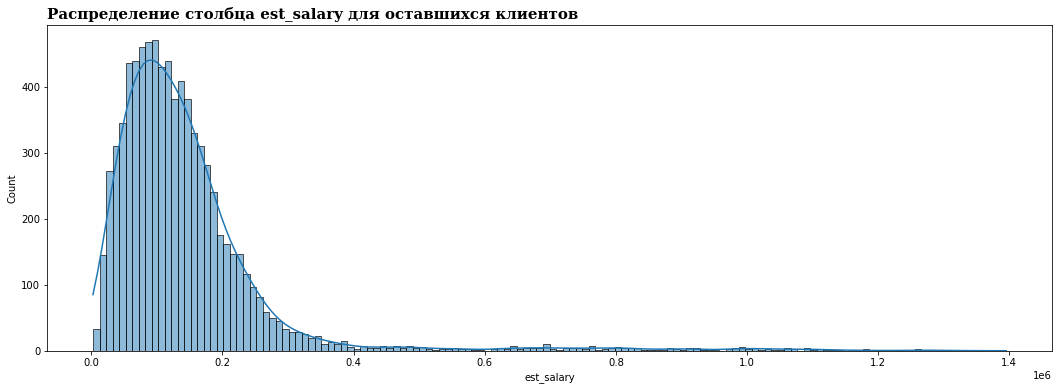

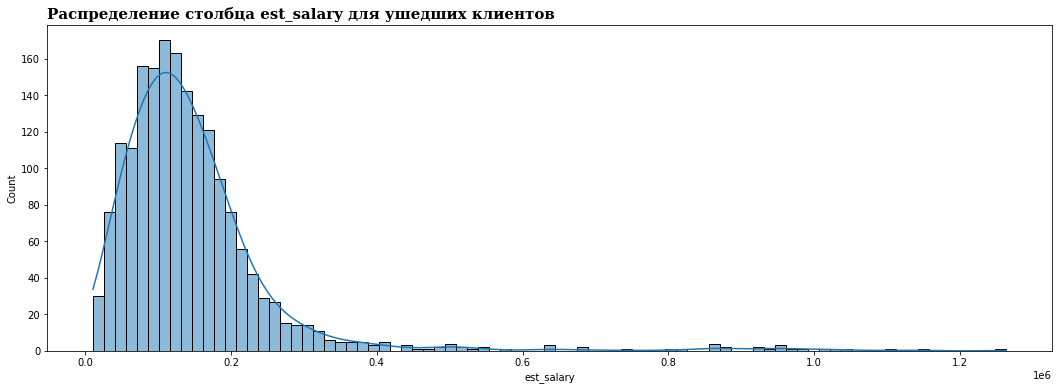

In [28]:
plt.figure(figsize = (18, 6))
sns.histplot(x=df.query('churn == 0')['est_salary'], kde=True)
plt.title('Распределение столбца est_salary для оставшихся клиентов', 
          fontdict= {'fontsize': 15, 'fontweight':'bold', 
                     'fontfamily':'serif'}, loc = 'left')
plt.show()

plt.figure(figsize = (18, 6))
sns.histplot(x=df.query('churn == 1')['est_salary'], kde=True)
plt.title('Распределение столбца est_salary для ушедших клиентов', 
          fontdict= {'fontsize': 15, 'fontweight':'bold', 
                     'fontfamily':'serif'}, loc = 'left')
plt.show()

Сформулируем нулевую и альтернативную гипотезы:  

**H0:** Доход клиентов, которые ушли из банка, **_равен_** доходу клиентов, которые остались   
**H1:** Доход клиентов, которые ушли из банка, **_не равен_** доходу клиентов, которые остались 

Получили гипотезу о равенстве средних двух генеральных совокупностей. Для ее проверки будем использовать t-тест.

Выберем уровень значимости равный alpha = 0.05.

Получили, что p-value > alpha, то есть данные не дают основания отвергнуть наше предположение.
Таким образом, по наблюдаемым данным можно сделать вывод, что скорее всего средний доход ушедших из банка клиентов равен среднему доходу оставшихся.

In [29]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df.query('churn == 1')['est_salary'], 
    df.query('churn == 0')['est_salary'],
    equal_var = False
)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран 
print('p-value:', results.pvalue.round(5))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.85158
Не получилось отвергнуть нулевую гипотезу


In [30]:
df.pivot_table(index='churn', values='est_salary', aggfunc=['mean', 'median']).round(2)

,mean,median
,est_salary,est_salary
churn,,
0,147674.64,118227.60
1,148289.70,125395.22


### Проверка гипотезы различия возраста тех клиентов, которые ушли и тех, которые остались
Проверим гипотезу о различии возраста ушедших и оставшихся клиентов. Как рассматривали раньше выборки достаточно большие.  

Сформулируем нулевую и альтернативную гипотезы:

**H0:** Возраст клиентов, которые ушли из банка, **_равен_** возрасту клиентов, которые остались   
**H1:** Возраст клиентов, которые ушли из банка, **_не равен_** возрасту клиентов, которые остались

Получили гипотезу о равенстве средних двух генеральных совокупностей. Для ее проверки будем использовать t-тест, так как все условия для его использования выполнены (ген. совокупности независимы; выборки большие, не обязательно должны быть распределены нормально)

Выберем уровень значимости равный alpha = 0.05.

Получили, что p-value < alpha, то есть по наблюдаемым данным можно сделать вывод, что, скорее всего, предположение неверно.  Таким образом, по наблюдаемым данным можно сделать вывод, что скорее всего средний возраст ушедших из банка клиентов отличается от среднего возраста оставшихся клиентов.


In [31]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df.query('churn == 1')['age'], 
    df.query('churn == 0')['age'],
    equal_var = False
)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран 
print('p-value:', results.pvalue.round(5))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


In [32]:
df.pivot_table(index='churn', values='age', aggfunc=['mean', 'median']).round(2)

,mean,median
,age,age
churn,,
0,43.02,40.0
1,41.45,39.0


### Проверка гипотезы различия количества продуктов, которыми пользуются ушедшие и оставшиеся клиенты

В ходе анализа было выявлено, что количество продуктов коррелирует с оттоком клиентов, поэтому проверим равно ли среднее количество продуктов у ушедших и оставшихся клиентов.  
Поскольку выборки являются большими по размеру, проверять распределение не будем, а сразу применим t-тест.

Сформулируем нулевую и альтернативную гипотезы:  

**H0:** Количество продуктов клиентов, которые ушли из банка, **_равно_** количеству продуктов клиентов, которые остались   
**H1:** Количество продуктов клиентов, которые ушли из банка, **_не равно_** количеству продуктов клиентов, которые остались 

Получили гипотезу о равенстве средних двух генеральных совокупностей. Для ее проверки будем использовать t-тест.

Выберем уровень значимости равный alpha = 0.05.

Получили, что p-value < alpha, то есть по наблюдаемым данным можно сделать вывод, что, скорее всего, предположение неверно.
Таким образом, по наблюдаемым данным можно сделать вывод, что скорее всего среднее количество продуктов ушедших из банка клиентов не равно среднему количеству продуктов оставшихся.

In [33]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df.query('churn == 1')['products'], 
    df.query('churn == 0')['products'],
    equal_var = False
)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран 
print('p-value:', results.pvalue.round(5))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


In [34]:
df.pivot_table(index='churn', values='products', aggfunc=['mean', 'median']).round(2)

,mean,median
,products,products
churn,,
0,1.76,2
1,2.38,2


### Вывод
Проверив гипотезы о равенстве средних, можно сделать следующие выводы:
- средний доход ушедших из банка клиентов **_равен_** среднему доходу оставшихся
- редний возраст ушедших из банка клиентов **_не равен_** среднему возрасту оставшихся клиентов
- среднее количество продуктов ушедших из банка клиентов **_не равно_** среднему количеству продуктов оставшихся

## Выделение признаков, которые больше всего влияют на отток клиентов

По итогам исследовательского анализа данных мы можем выделить наиболее влияющие на отток признаки:  
- products — количество продуктов, которыми пользуется клиент (отточные клиенты имеют 2-4 продукта)
- gender — пол (мужчины чаще являются отточными клиентами)
- equity — количество баллов собственности (отточные клиенты имеют количество баллов равное 3-5)
- age — возраст (возраст отточных клиентов находится в промежутке от 20 до 35 лет и от 49 до 61, самый большой отток клиентов 25-30 или 54-56 лет)
- score — баллы кредитного скоринга (баллы кредитного скоринга отточных клиентов равны от 840 до 945, самый большой отток у клиентов с баллами 860-870)
- last_activity — активный клиент (активные клиенты уходят чаще)

## Сегментирование клиентов банка
Для выделения сегментов будем комбинировать высокоотточные признаки и смотреть процент оттока в сегменте и сравнивать его с общим оттоком по банку. Всего необходимо выделить 5-6 сегментов (сегменты должны содержать 1-2 тыс клиентов). Затем выберем из этих сегментов 2-3 самых отточных.

In [35]:
(df.query('840 <= score <= 945 & last_activity == 1 & products in (2, 3, 4)')
 .agg({'churn':['mean', 'sum', 'count']}).round(3))

,churn
mean,0.5
sum,810.0
count,1619.0


In [36]:
(df.query('840 <= score <= 945 & gender == "М" & equity in (3, 4, 5)')
 .agg({'churn':['mean', 'sum', 'count']}).round(3))

,churn
mean,0.461
sum,614.000
count,1332.000


In [37]:
df.query('equity in (3, 4, 5) & last_activity == 1 & gender == "М"').agg({'churn':['mean', 'sum', 'count']}).round(3)

,churn
mean,0.45
sum,593.00
count,1319.00


In [38]:
(df.query('gender == "М" & (25 <= age <= 35 | 49 <= age <= 61) & equity in (3, 4, 5)')
 .agg({'churn':['mean', 'sum', 'count']}).round(3))

,churn
mean,0.408
sum,583.000
count,1430.000


In [39]:
df.query('products in (2, 3, 4) & last_activity == 1 & gender == "М"').agg({'churn':['mean', 'sum', 'count']}).round(3)

,churn
mean,0.407
sum,658.000
count,1617.000


In [40]:
(df.query('840 <= score <= 945 & (25 <= age <= 35 | 49 <= age <= 61) & gender == "М"')
 .agg({'churn':['mean', 'sum', 'count']}).round(3))

,churn
mean,0.345
sum,487.000
count,1412.000


In [41]:
df.query('products in (2, 3, 4) & equity == 5').agg({'churn':['mean', 'sum', 'count']}).round(3)

,churn
mean,0.319
sum,519.000
count,1625.000


### Вывод
Таким образом, мы выделели 7 сегментов, процент оттока в них варьируется от 32% до 50%, что выше оттока по банку в целом (18%).  

**3 самых отточных сегмента** обладают следующими признаками:  
1. **отток - 50%, количество клиентов в сегменте - 1619**
    - активные клиенты
    - баллы кредитного скоринга в промежутке от 840 до 945
    - количество продуктов, которыми пользуется клиент равно 2-4  
    
    
2. **отток - 46%, количество клиентов в сегменте - 1332**
    - клиенты мужского пола
    - баллы кредитного скоринга в промежутке от 840 до 945
    - количество баллов собственности равно 3-5  
    
    
3. **отток - 45%, количество клиентов в сегменте - 1319**
    - клиенты мужского пола
    - активные клиенты
    - количество баллов собственности равно 3-5
    
Во всех сегментах встречаются признаки: 
- пол
- активность
- баллы кредитного скоринга
- количество баллов собственности
- количество продуктов, которыми пользуется клиент  

Стоит обратить на них больше всего внимания.


## Вывод
Было проведено исследование оттока клиентов для отдела маркетинга банка «Метанпром». Стояла задача **выделить сегменты наиболее отточных клиентов банка.**  
Для исследования был предоставлен датасет, содержащий данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Исходный датасет содержал 10000 строк и 12 столбцов. В столбцах содержится основная информация о клиентах банка(город, пол, возраст, баланс на счету и т.д.).  

В ходе **предобработки данных** были найдены пропуски и дубликаты, возникшие из-за технических ошибок в банке. Они были обработаны следующим образом:
- удалены строки с пропусками в столбце `age`
- проанализированы и оставлены без изменения пропуски в столбце `balance`
- неявные дубликаты в столбце `userid` оставлены без изменений, так как сами строки не являются дубликатами

Были проведены **анализ распределений и корреляционный анализ** по результатам которых были сформированы портреты отточных и неотточных клиентов банка:

**Оставшиеся клиенты:**
- Проживают в городе Ярославль или Рыбинск
- Могут быть как мужского, так и женского пола
- Имеют количество баллов собственности равное 0
- Имеют 2 банковских продукта
- Имеют кредитную карту
- Могут быть как активными, так и неактивными клиентами банка
- Имеют баллы кредитного скоринга от 700 до 840 или от 945 до 1000
- Возраст клиентов от 35 до 49 лет или от 61 до 80
- Имеют баланс на счете ниже 750 тыс. рублей
- Имеют з/п менее 90 тыс. рублей

**Ушедшие клиенты:**
- Проживают в городе Ярославль
- Клиенты мужского пола
- Имеют количество баллов собственности равное 5
- Имеют 2 или 4 банковских продукта
- Не имеют кредитную карту
- Являются активными клиентами банка
- Имеют баллы кредитного скоринга от 840 до 945, самый большой отток у клиентов с баллами 860-870
- Возраст клиентов от 20 до 35 лет или от 49 до 61, самый большой отток клиентов 25-30 или 54-56 лет
- Имеют баланс на счете выше 750 тыс. рублей
- Имеют з/п более 90 тыс. рублей

Также **были проверены гипотезы** для подтверждения предположений о некоторых значимых признаках, получены следующие выводы:
- средний доход ушедших из банка клиентов **_равен_** среднему доходу оставшихся
- редний возраст ушедших из банка клиентов **_не равен_** среднему возрасту оставшихся клиентов
- среднее количество продуктов ушедших из банка клиентов **_не равно_** среднему количеству продуктов оставшихся

Для выделения сегментов необходимо было также отдельно выделить **признаки, которые больше всего влияют на отток клиентов**: 
- products — количество продуктов, которыми пользуется клиент (отточные клиенты имеют 2-4 продукта)
- gender — пол (мужчины чаще являются отточными клиентами)
- equity — количество баллов собственности (отточные клиенты имеют количество баллов равное 3-5)
- age — возраст (возраст отточных клиентов находится в промежутке от 20 до 35 лет и от 49 до 61, самый большой отток клиентов 25-30 или 54-56 лет)
- score — баллы кредитного скоринга (баллы кредитного скоринга отточных клиентов равны от 840 до 945, самый большой отток у клиентов с баллами 860-870)
- last_activity — активный клиент (активные клиенты уходят чаще)



После комбинирования признаков и выделения сегментов клиентов были выделены следующие **наиболее отточные сегменты**:

1. **отток - 50%, количество клиентов в сегменте - 1619**
    - активные клиенты
    - баллы кредитного скоринга в промежутке от 840 до 945
    - количество продуктов, которыми пользуется клиент равно 2-4  
    
    
2. **отток - 46%, количество клиентов в сегменте - 1332**
    - клиенты мужского пола
    - баллы кредитного скоринга в промежутке от 840 до 945
    - количество баллов собственности равно 3-5  
    
    
3. **отток - 45%, количество клиентов в сегменте - 1319**
    - клиенты мужского пола
    - активные клиенты
    - количество баллов собственности равно 3-5
    


## Рекомендации
Проведя исследование и сегментацию пользователей для выявления наиболее отточных сегментов, можно выделить следующие признаки, на которые необходимо обратить внимание:  
- пол
- активность
- баллы кредитного скоринга
- количество баллов собственности
- количество продуктов, которыми пользуется клиент  

Можно дать следующие рекомендации на основе проведенного анализа:
- Поскольку мужчины более склонны уходить из банка, необходимо выявить причины этого. Возможно следует предложить какие-то более выгодные предложения, чтобы снизить отток.
- Необходимо выявить причины того, почему активные пользователи уходят из банка. Скорее всего их что-то не усраивает, если они активно пользуются услугами, а затем совсем уходят из банка. Можно провести опрос среди них, попросить обратную связь.
- Банк покидают клиенты с довольно высоким скоринговым баллом, скорее всего они являются активными пользователями и их также не устраивают условия, предлагаемые банком. 
- Необходимо рассмотреть или запросить обратную связь у клиентов, которые пользуются 4 банковскими продуктами, поскольку среди них больше ушедших, чем оставшихся. Хоть их и немного, за счет использования большего количества продуктов, они могут принести большую прибыль банку.

В целом для удержания клиентов рекомендуется рассмотреть дополнительные привилегии для активных клиентов, с высоким скоринговым баллом, которые пользуются многими банковскими продуктами.